In [38]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [1]:
import numpy as np
import pandas as pd
import warnings
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
warnings.filterwarnings('ignore')
import spacy
en = spacy.load('en_core_web_sm')
from time import time
from tqdm import tqdm
from nltk import pos_tag
#import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [2]:
new_data=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/extreme right antisemitism _ new.csv")
data=new_data[['Date','Post']]
data=data.drop_duplicates()
print(data.isnull().sum())
data=data.dropna()
#data['Post']=data.groupby(['Date'])['Post'].transform(lambda x:' '.join(x))
#data=data.drop_duplicates()
#data=data.iloc[:-2,:]

Date    1
Post    1
dtype: int64


In [3]:
data['Date']=data['Date'].apply(lambda x:datetime.strptime(str(x),'%d/%m/%y'))

In [4]:
#data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')
#data=data.iloc[:-4,:]
print(data.head())
print(data.shape)


            Date                                               Post
6374  2022-12-24  >>409477824 He entire GOP is ZOG. Itâ€™s all a...
12387 2022-12-24                >>409482710 >those kike demon claws
12388 2022-12-24  >>4094824525 % of all americans especially bla...
12389 2022-12-24  >>409477876 he is shit, I watched him briefly ...
12390 2022-12-24  >>409483440 I'm going to take a wild guess tha...
(36037, 2)


In [6]:
data.post=data.Post.astype(str)

## Text Cleaning

In [5]:
#Removing links
data['clean']=data['Post'].apply(lambda x:re.sub(r"http\S+","",str(x)))
#Converting letters into lowercase
data['clean']=data['clean'].apply(lambda x: x.lower())
#removing digits
data['clean']=data['clean'].apply(lambda x:re.sub("\d",'',x))
# removing punctuations
data['clean']=data['clean'].apply(lambda x:x.translate(str.maketrans("","",string.punctuation)))
#Include only letters
data['clean']=data['clean'].apply(lambda x:re.sub("[^a-zA-Z]"," ",x))
data.head()

,Date,Post,clean
6374,2022-12-24,>>409477824 He entire GOP is ZOG. Itâ€™s all a...,he entire gop is zog it s all a uniparty no...
12387,2022-12-24,>>409482710 >those kike demon claws,those kike demon claws
12388,2022-12-24,>>4094824525 % of all americans especially bla...,of all americans especially blacks would acc...
12389,2022-12-24,">>409477876 he is shit, I watched him briefly ...",he is shit i watched him briefly when i was y...
12390,2022-12-24,>>409483440 I'm going to take a wild guess tha...,im going to take a wild guess that the guy th...


## Text Preprocessing

In [6]:
def bigstring(text):
    new=[]
    for i in text:
        if len(i)<11:
            new.append(i)
    return new
def remove_stopwords(text):
    stopwords1=set(stopwords.words('english'))
    stopwords2= en.Defaults.stop_words
    modified_text=[]
    for i in text:
        if i not in stopwords1 and i not in stopwords2:
            modified_text.append(i)
    return (modified_text)
def lematize(text):
    lematizer=WordNetLemmatizer()
    lema=[]
    for i in text:
        lema.append(lematizer.lemmatize(i))
    return (" ".join(lema))
def pos(text):
    #Filtering terms of particular parts of speech
    p=pos_tag(text)
    pos_removal=[]
    for tag in p:
        if tag[1]=='JJ' or tag[1]=='NN' or tag[1]=='NNS'or tag[1]=='NNP'or tag[1]=='VBP':
            pos_removal.append(tag[0])
    return pos_removal

In [7]:
data['clean']=data['clean'].apply(lambda x:word_tokenize(x))
data['clean']=data['clean'].apply(lambda x:pos(x))
data['clean']=data['clean'].apply(lambda x:bigstring(x))
data['clean']=data['clean'].apply(lambda x:remove_stopwords(x))
data['clean']=data['clean'].apply(lambda x:lematize(x))
data.head()

,Date,Post,clean
6374,2022-12-24,>>409477824 He entire GOP is ZOG. Itâ€™s all a...,entire gop uniparty stage aipac
12387,2022-12-24,>>409482710 >those kike demon claws,kike demon claw
12388,2022-12-24,>>4094824525 % of all americans especially bla...,american black kike killer mission rest anit b...
12389,2022-12-24,">>409477876 he is shit, I watched him briefly ...",shit nowadays he horrendous check channel lock...
12390,2022-12-24,>>409483440 I'm going to take a wild guess tha...,im wild guess guy thread time meme flag kike


## Game starts from here

In [10]:
def emerging(starting_date,window,terms):
    x=pd.to_datetime(starting_date)
    windowsize=window
    glossary=[]
    important_terms={}
    z=1
    check=True
    if x>data['Date'].max():
        return 'Check the starting date'
    
    while(tqdm(check)):
        if (x+timedelta(days=windowsize))>=data['Date'].max():
            y=data['Date'].max()
            check=False
        else:
            y=(x+timedelta(days=windowsize))
        data1=data.clean[(data['Date']>=x)&(data['Date']<y)]
        text=' '.join(data1)
        x=x+timedelta(days=windowsize)
        tf_idfvectorizer=TfidfVectorizer(ngram_range=(2,2))
        tfidf=tf_idfvectorizer.fit_transform(data1)
        features=tf_idfvectorizer.get_feature_names_out()
        
        #Exporting Bigrams
        #pd.DataFrame(features).to_csv("Bigrams "+str(z)+".csv",header=['All Bigrams'])
        
        #Finding Emerging terms/Initializing glossary
        emerging_terms=[]
        for i in features:
            if i not in glossary:
                emerging_terms.append(i)
                #glossary.append(i)
        
        #Finding the index of emerging terms
        findex=[i for i,word in enumerate(features) if word in emerging_terms ]
        
        #Finding the highest tf-idf value for all the feature names across all documents
        tfidf_values={}
        for column in tqdm(findex):
            high=0
            for row in range(tfidf.shape[0]):
                if tfidf[row,column]>high:
                    high=tfidf[row,column]
            tfidf_values[features[column]]=high
        
        tfidf_values=sorted(tfidf_values.items(),key=lambda x:x[1],reverse=True)
        
        #Exporting Top Tf-idf values with bigrams
        
        #pd.DataFrame(tfidf_values).to_csv("SubtractionBigram-Tfidf "+str(z)+".csv",header  = ['Bigrams','TF-IDF Values'])
        print(tfidf_values[:20])
    
        #Getting tfidf values after threshold cut off
        a=0
        for i in tfidf_values:
            a=a+i[1]
        print("Threshold for "+str(z)+ "window",a/len(tfidf_values))
        final_tfidf={}
        for i in tfidf_values:
            if i[1]>a/len(tfidf_values):
                final_tfidf[i[0]]=i[1]
            else:
                glossary.append(i[0])
        #Exporting Tf-idf values above threshold
        #pd.DataFrame.from_dict(data=final_tfidf, orient='index').to_csv("Bigram_threshold "+str(z)+".csv",index_label='Bigrams',header  = ['TF-IDF Values'])
        
        #Frequency of words in that window size
        words_frequency={}
        text1=text.split(" ")
        pairs=list(zip(text1[:-1],text1[1:]))
        bigrams=[' '.join(i) for i in pairs]
        for word in (final_tfidf.keys()):
            words_frequency[word]=0
            #IF term is a bigram or unigram
            if len(word.split())==2:
                for i in bigrams:
                    if word==i:
                        words_frequency[word]=words_frequency[word]+1
            else:
                #If term is a unigram
                for j in text1:
                    if word==j:
                        words_frequency[word]=words_frequency[word]+1
                
        words_frequency=sorted(words_frequency.items(),key=lambda x:x[1],reverse=True)
        
        #Appending terms in Imp terms list
        for i in range(terms):
            important_terms[words_frequency[i][0]]=words_frequency[i][1]
        # Frequency for Important terms
        for key in important_terms.keys():
            important_terms[key]=0
            # If term is a bigram or unigram
            if len(key.split())==2:
                for i in bigrams:
                    if key==i:
                        important_terms[key]=important_terms[key]+1
            else:
                #If term is a unigram
                for j in text1:
                    if key==j:
                        important_terms[key]=important_terms[key]+1
        
        
        # Exporting Bigrams with frequency
        #pd.DataFrame(words_frequency).to_csv("Bigram_frequency "+str(z)+".csv",header  = ['Bigrams','Frequency'])
        
        #Exporting Important terms that is coming from 1st window
        pd.DataFrame.from_dict(data=important_terms, orient='index').to_csv("Important_terms "+str(z)+".csv",index_label='Bigrams',header  = ['TF-IDF Values'])

        
        #Ploting the graph
        x_label=[]
        y_label=[]
        for i in range(terms):
            x_label.append(words_frequency[i][0])
            glossary.append(words_frequency[i][0])
        for i in range(terms):
            y_label.append(words_frequency[i][1])
        plt.figure(figsize=(20,5))
        plt.bar(range(len(x_label)),y_label,tick_label=x_label)

        plt.show()
        z=z+1

    
    

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 73071/73071 [3:34:35<00:00,  5.68it/s]


[('american kike', 1.0), ('andrewtate soros', 1.0), ('anti thread', 1.0), ('antifa soros', 1.0), ('antiwhite kike', 1.0), ('ask soros', 1.0), ('audit soros', 1.0), ('bandera kike', 1.0), ('bastard kike', 1.0), ('begone kike', 1.0), ('bill gop', 1.0), ('boycock kike', 1.0), ('brain zog', 1.0), ('burn rothschild', 1.0), ('cold zog', 1.0), ('course soros', 1.0), ('crime cartel', 1.0), ('david rothschild', 1.0), ('dc kike', 1.0), ('deceitful kike', 1.0)]
Threshold for 1window 0.17614083276776996


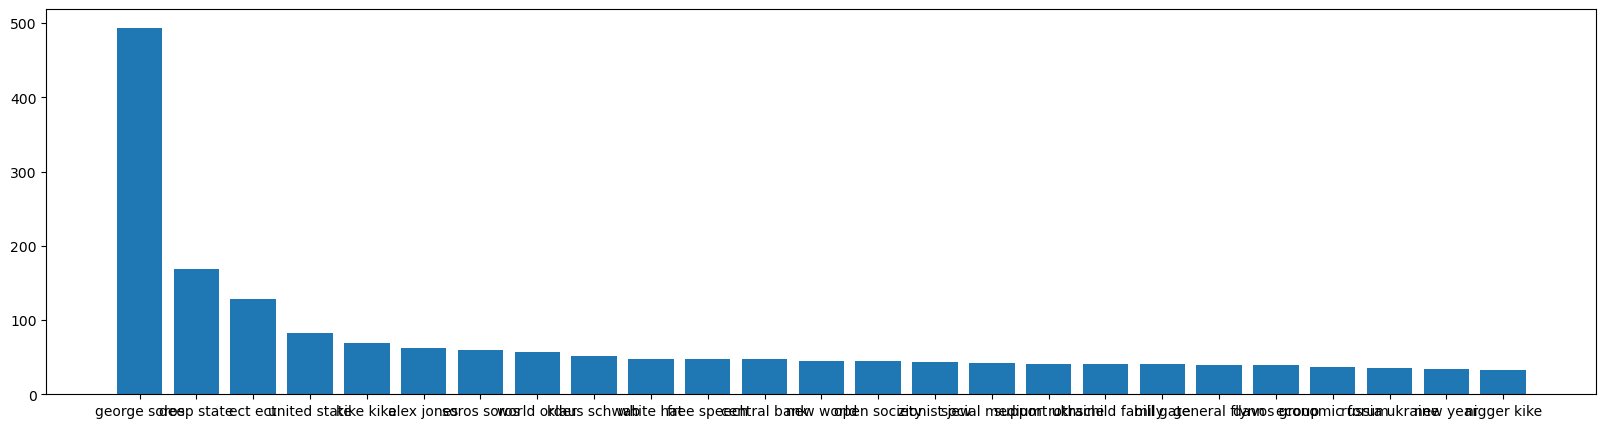

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 86369/86369 [1:36:52<00:00, 14.86it/s]


[('america controlled', 1.0), ('article dot', 1.0), ('article hedge', 1.0), ('awful soros', 1.0), ('bill soros', 1.0), ('black race', 1.0), ('chance kike', 1.0), ('christ kike', 1.0), ('comchina election', 1.0), ('cone rothschild', 1.0), ('covid fatal', 1.0), ('cry kike', 1.0), ('darth soros', 1.0), ('date suicide', 1.0), ('dead worry', 1.0), ('dirty kike', 1.0), ('dont mean', 1.0), ('dr ellie', 1.0), ('duh angloskys', 1.0), ('dumb nigger', 1.0)]
Threshold for 2window 0.1667531642434448


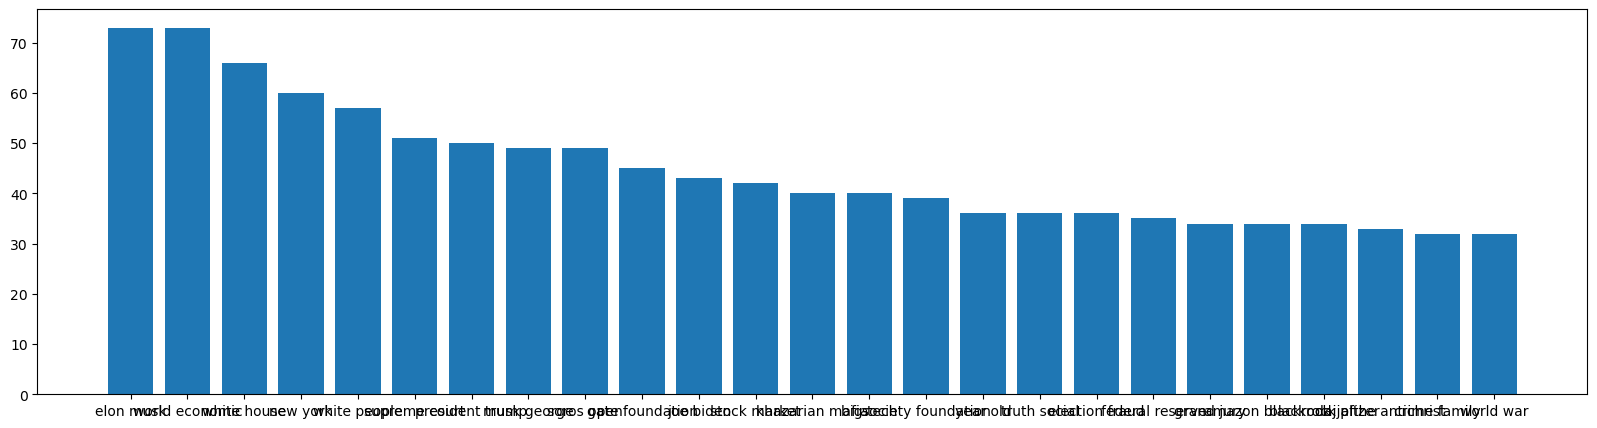

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 96082/96082 [2:13:03<00:00, 12.04it/s]


[('abrahamic kike', 1.0), ('ad kike', 1.0), ('alex soros', 1.0), ('alexander soros', 1.0), ('altkike movement', 1.0), ('anti thread', 1.0), ('antic soros', 1.0), ('as kike', 1.0), ('bankwhy bolivia', 1.0), ('blame soros', 1.0), ('boomer kike', 1.0), ('caucus soros', 1.0), ('chick kike', 1.0), ('citizen recall', 1.0), ('common soros', 1.0), ('cop themsoros', 1.0), ('cope kike', 1.0), ('countryt kike', 1.0), ('crowder kike', 1.0), ('cry alive', 1.0)]
Threshold for 3window 0.17779101467975772


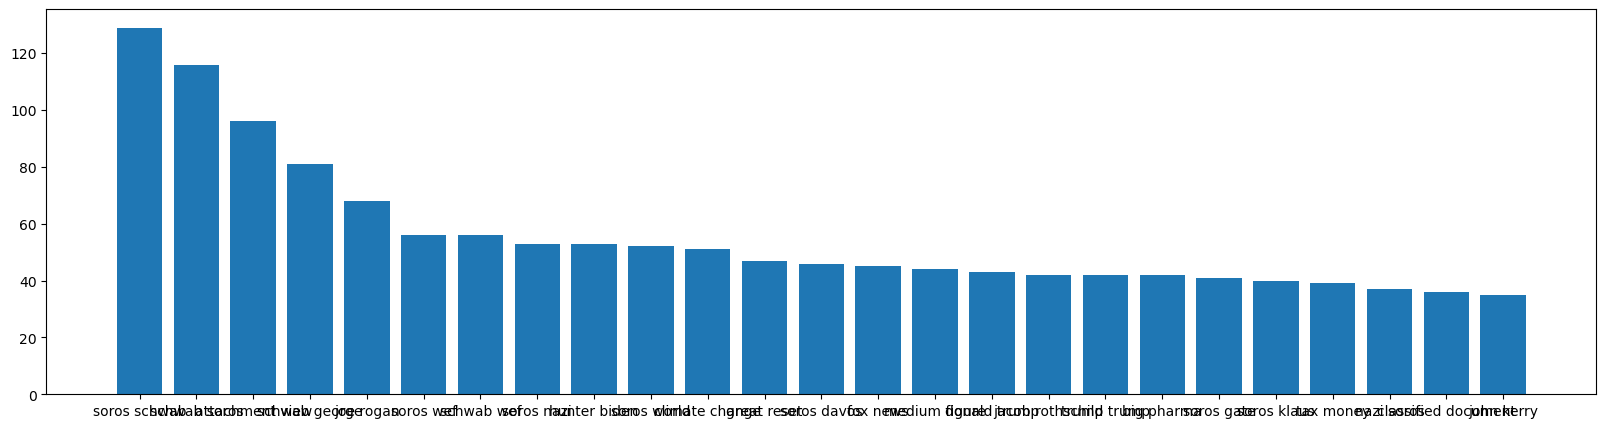

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 87350/87350 [1:37:26<00:00, 14.94it/s]


[('alex soros', 1.0), ('alright kike', 1.0), ('anti zog', 1.0), ('antifa hollywood', 1.0), ('antikike yid', 1.0), ('anuskike hand', 1.0), ('aquatic kike', 1.0), ('bbbbut soros', 1.0), ('begone kike', 1.0), ('bighead rothschild', 1.0), ('black soros', 1.0), ('blatant mind', 1.0), ('bos soros', 1.0), ('bos zog', 1.0), ('bot kike', 1.0), ('britishall field', 1.0), ('butthurt poltards', 1.0), ('cant soros', 1.0), ('capitalism kike', 1.0), ('censorship kike', 1.0)]
Threshold for 4window 0.17304514960277118


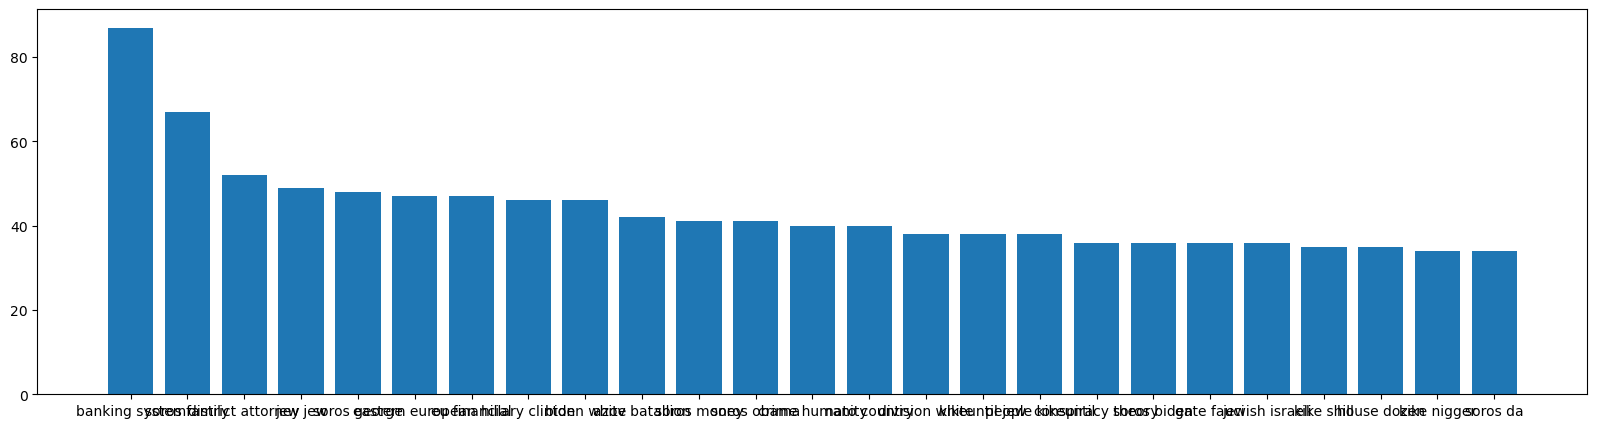

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 81773/81773 [1:23:20<00:00, 16.35it/s]


[('ad kike', 1.0), ('airspace know', 1.0), ('alex deal', 1.0), ('alex soros', 1.0), ('alexander deal', 1.0), ('angry kike', 1.0), ('antiwhite kike', 1.0), ('bastard child', 1.0), ('beaner kike', 1.0), ('begone kike', 1.0), ('blame soros', 1.0), ('bridge troll', 1.0), ('bsyou soros', 1.0), ('buddy kike', 1.0), ('cant strike', 1.0), ('central zog', 1.0), ('child connect', 1.0), ('chink kike', 1.0), ('confess video', 1.0), ('control denier', 1.0)]
Threshold for 5window 0.16740990096603425


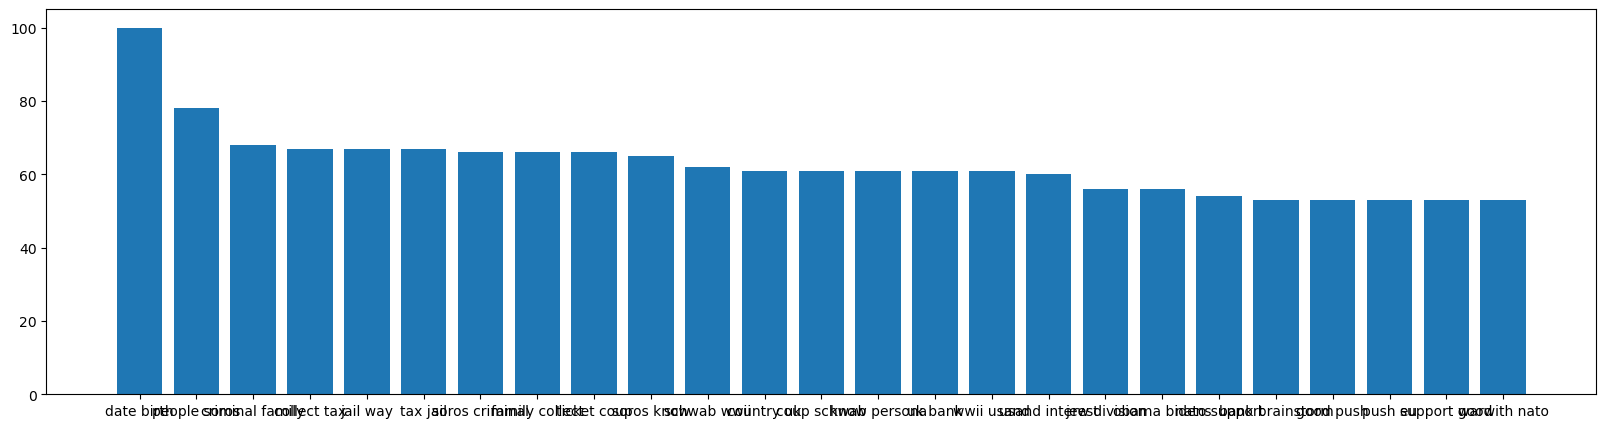

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 74247/74247 [1:07:34<00:00, 18.31it/s]


[('ad kike', 1.0), ('alexander soros', 1.0), ('anti thread', 1.0), ('arrest terrorist', 1.0), ('arrimadas politician', 1.0), ('ask soros', 1.0), ('assad rothschild', 1.0), ('autistic kike', 1.0), ('baltcucks zog', 1.0), ('bde comedy', 1.0), ('believe probable', 1.0), ('bet soross', 1.0), ('biden kike', 1.0), ('bitchass kike', 1.0), ('boon kike', 1.0), ('celtic kike', 1.0), ('chance datamine', 1.0), ('chicken kike', 1.0), ('china medium', 1.0), ('christ kike', 1.0)]
Threshold for 6window 0.18467848165255807


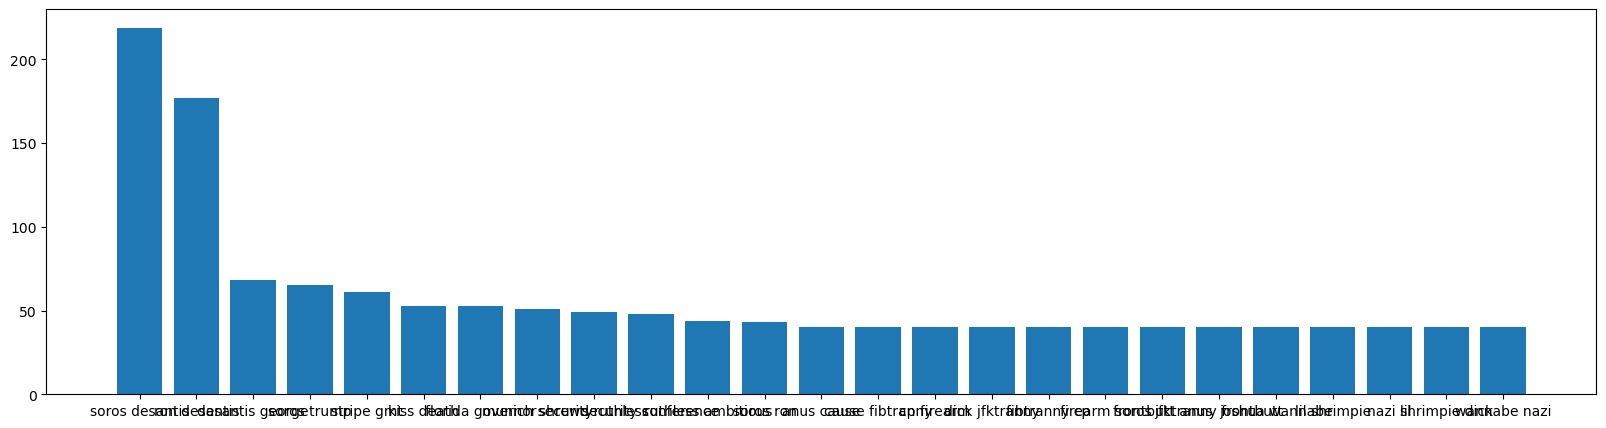

0it [00:00, ?it/s]


In [11]:
emerging(starting_date='2022-12-24',window=10,terms=25)

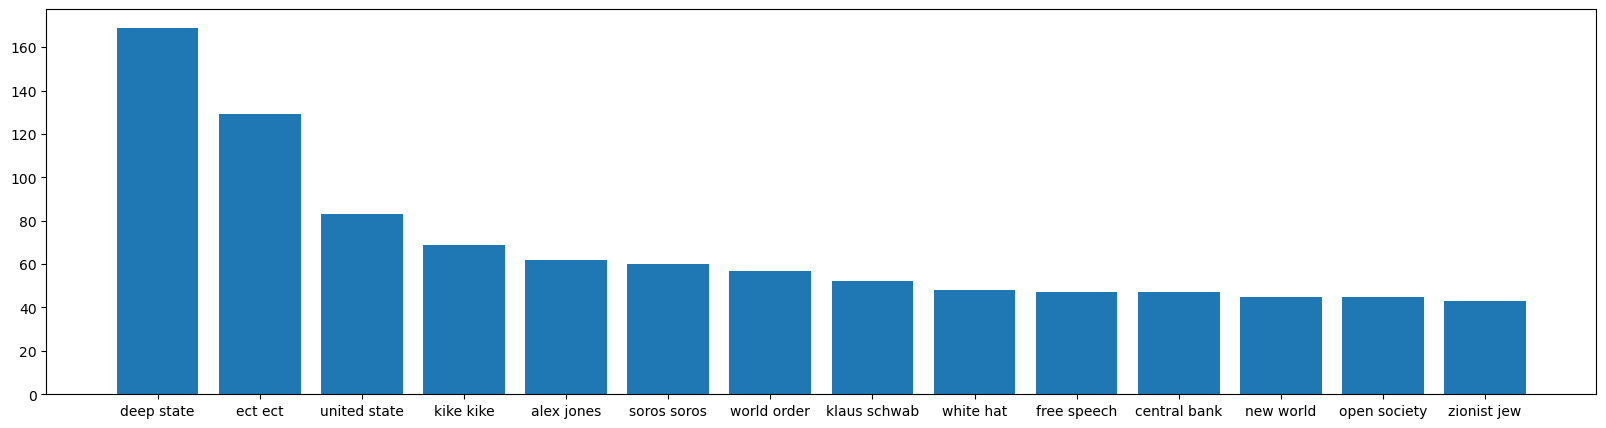

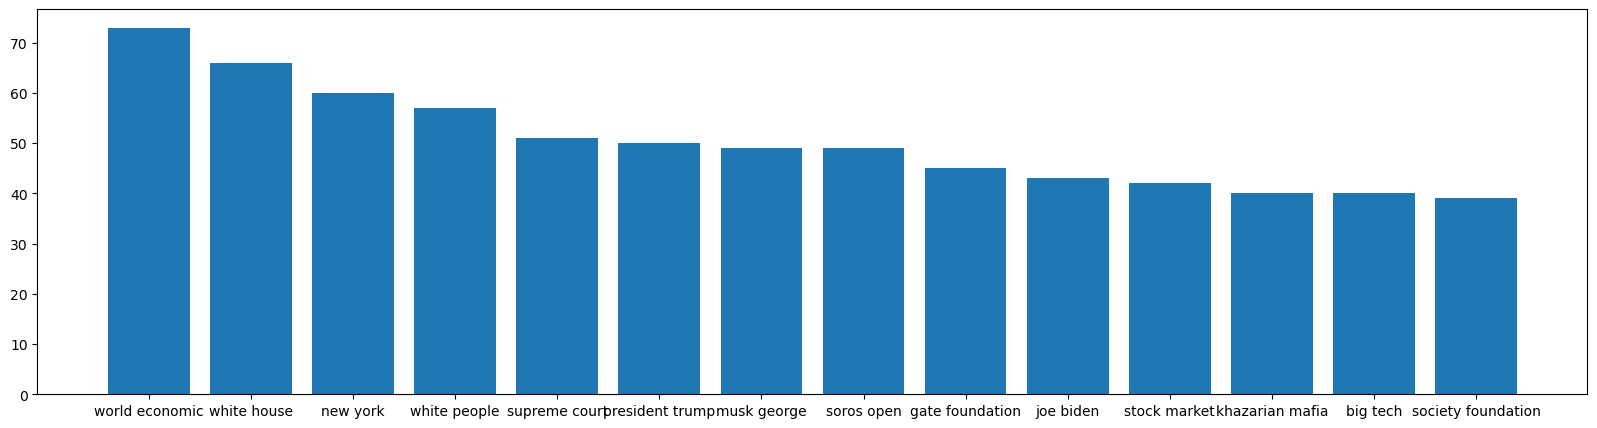

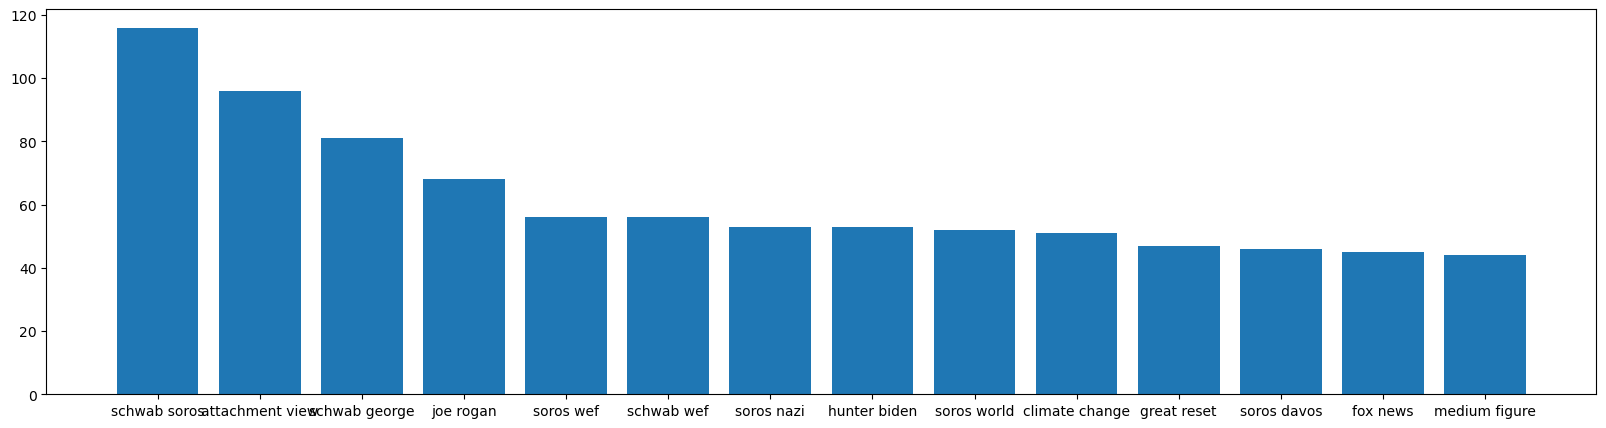

In [17]:

for row in range(3):
    data=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/Scripts/Important_terms "+str(row+1)+".csv")
    bigrams=list(data['Bigrams'])
    frequency=list(data['TF-IDF Values'])
    xlab=[]
    ylab=[]
    for i in range((25*row)+1,(25*row)+15):
        xlab.append(bigrams[i])
        ylab.append(frequency[i])
    plt.figure(figsize=(20,5))
    plt.bar(range(len(xlab)),ylab,tick_label=xlab)
    

In [19]:
imp_terms=['date','george soros','deep state','world order','white people','white hat','mafia brat','gaylord obama',
                     'rothschild family','new world','jew trump','central bank','control world','social medium',
                     'soros schwab','zionist jew','open society','ect ect','brat pelosi','talmud','globalist',
          'nancy pelosi','klaus schwab','fucking kike','nazi soros','rothschild','bill gate','elites','fauci',
          'global request','penalty global','joe rogan','medium figure','satellite office','digital banking','bombshell soros','den djupa']

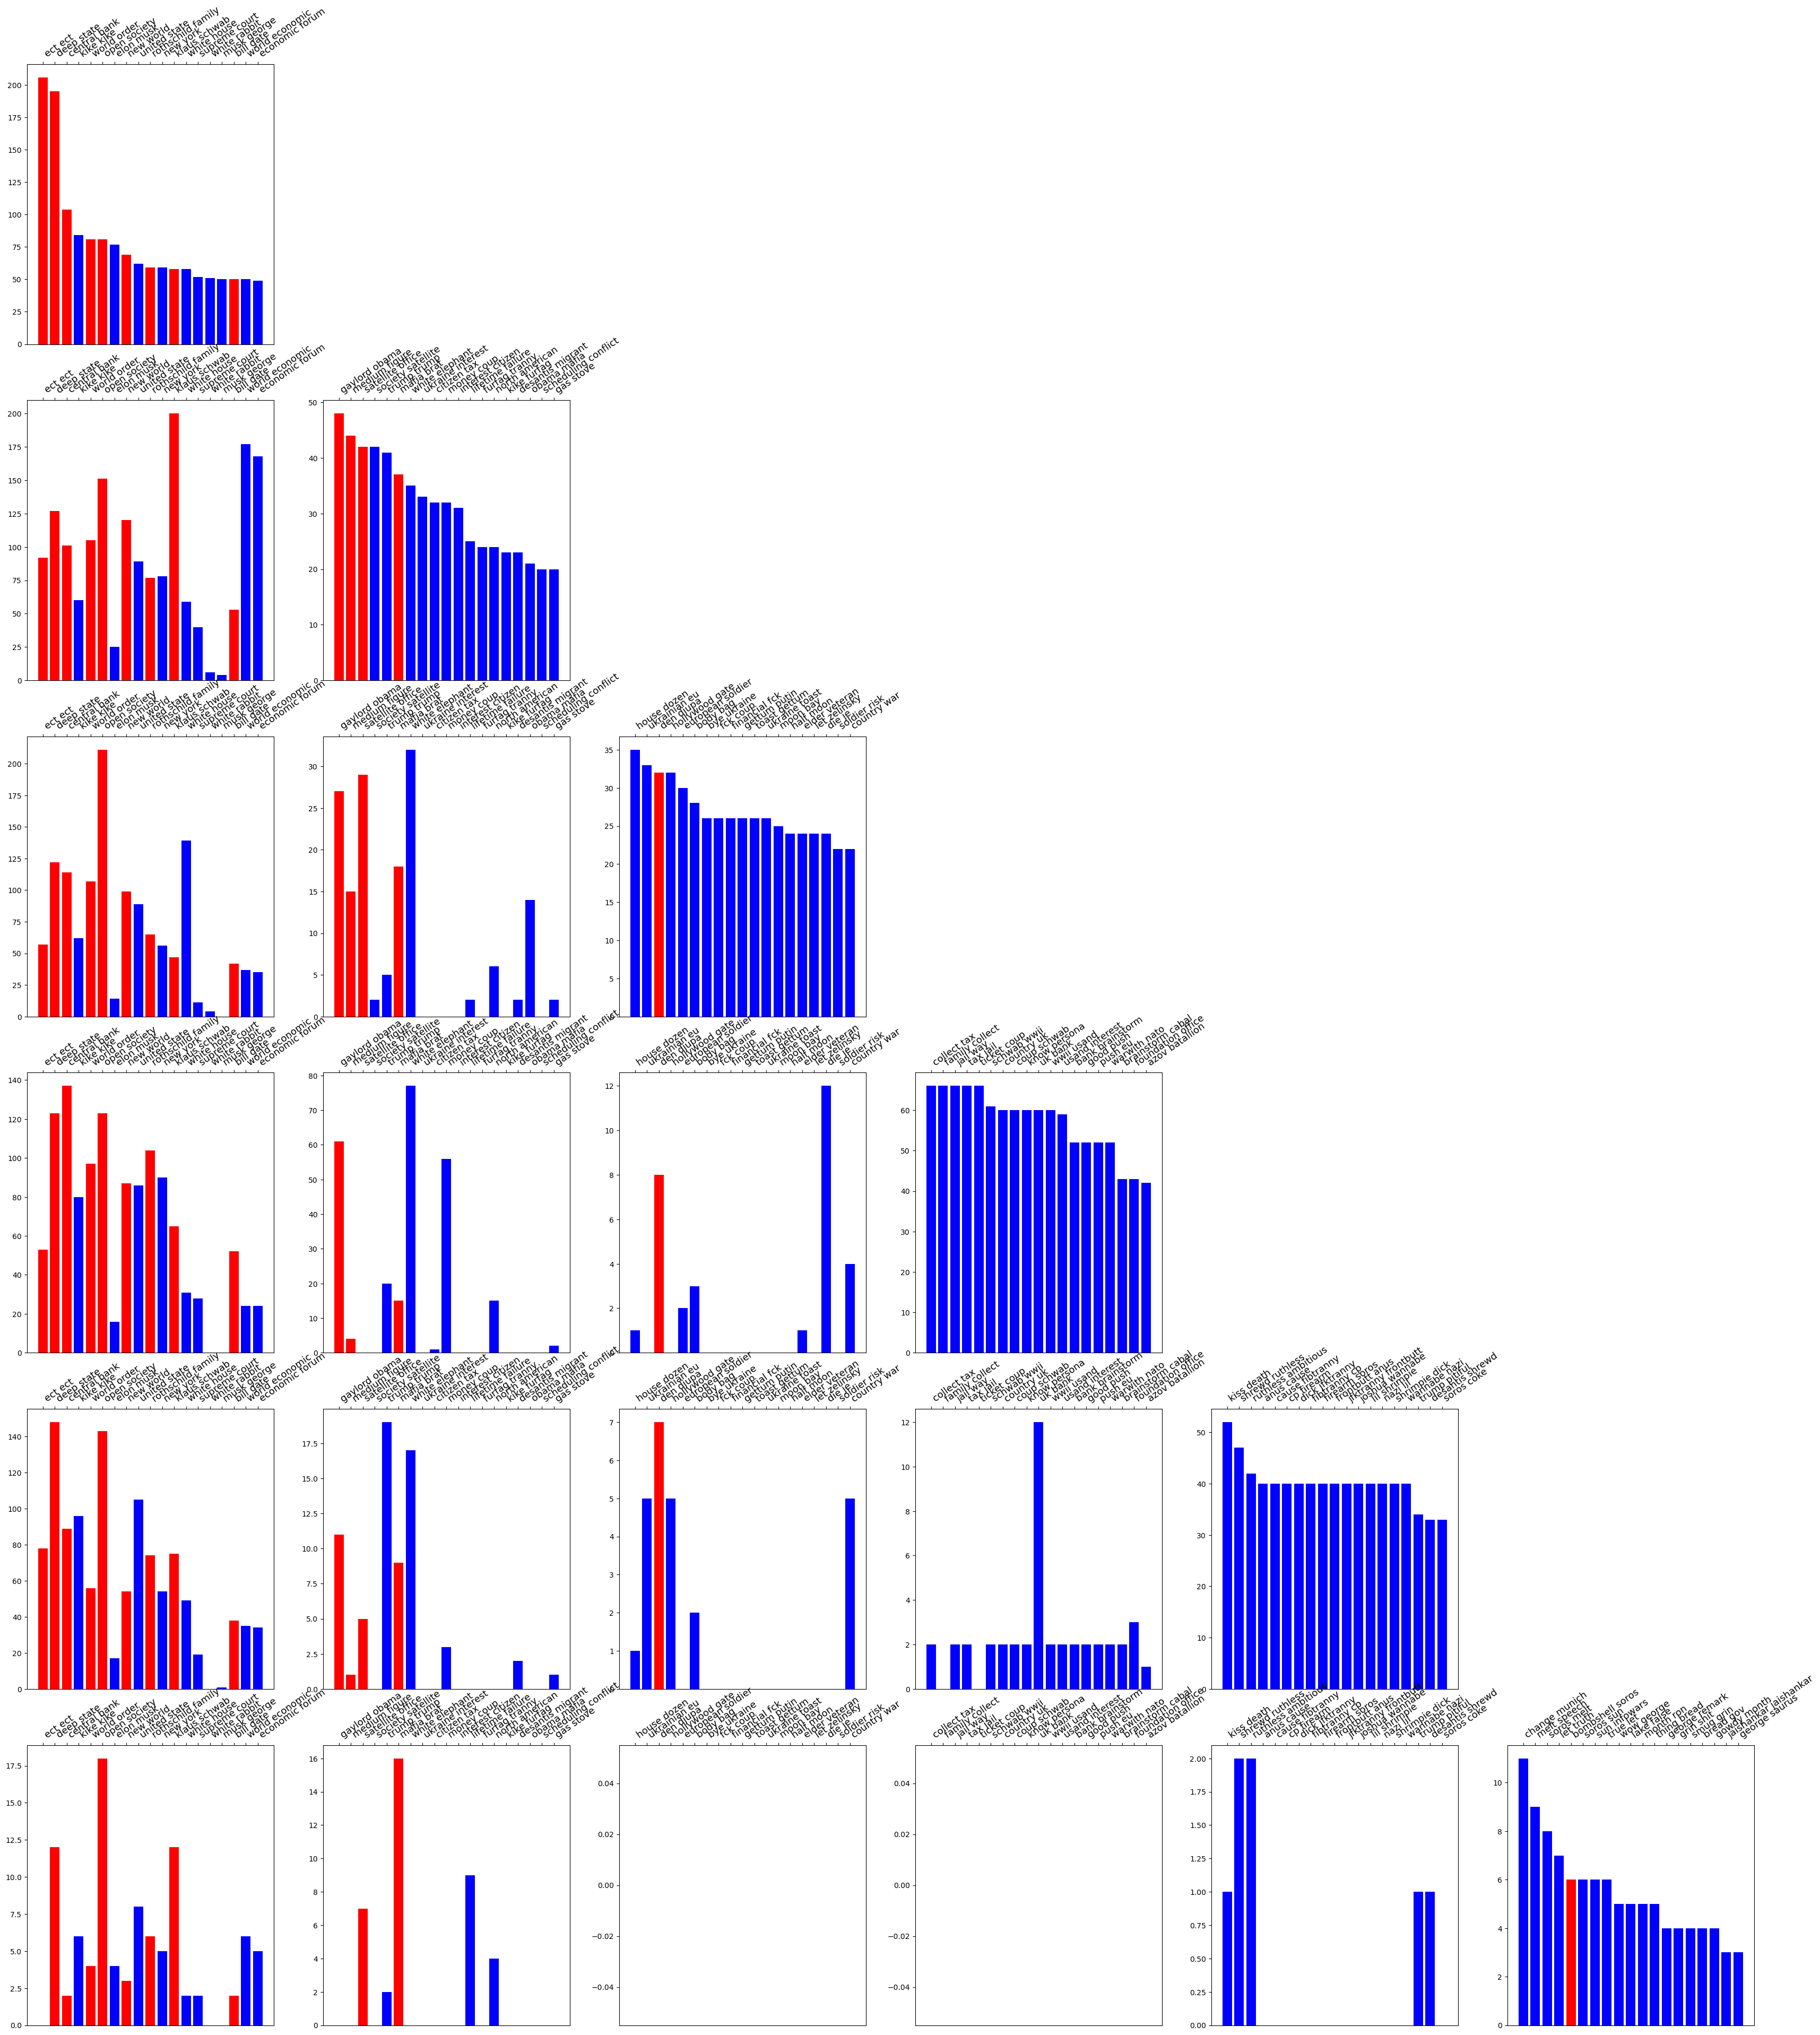

In [20]:
fig,ax=plt.subplots(6,6,figsize=(42,48))
for row in range(6):
    important=pd.read_csv("/Users/dhanushkikkisetti/Documents/Important_terms "+ str(row+1)+".csv")
    bigram=list(important['Bigrams'])
    frequency=list(important['TF-IDF Values'])
    for column in range(row+1):
        xlab=[]
        ylab=[]
        for i in range((20*column)+1,(20*column)+20):
            xlab.append(bigram[i])
            ylab.append(frequency[i])
        colour=['red' if word in imp_terms else 'blue' for word in xlab]
        ax[row,column].bar(range(len(xlab)),ylab,tick_label=xlab,color=colour)
        #ax[row,column].tick_params(axis="x", labelsize=13)
        ax[row,column].xaxis.set_ticks_position('top')
        plt.setp( ax[row,column].xaxis.get_majorticklabels(), rotation=35,fontsize=13, ha="left" )

    for z in range(row+1,6):
        if z!=6:
            fig.delaxes(ax[row][z])
    
    


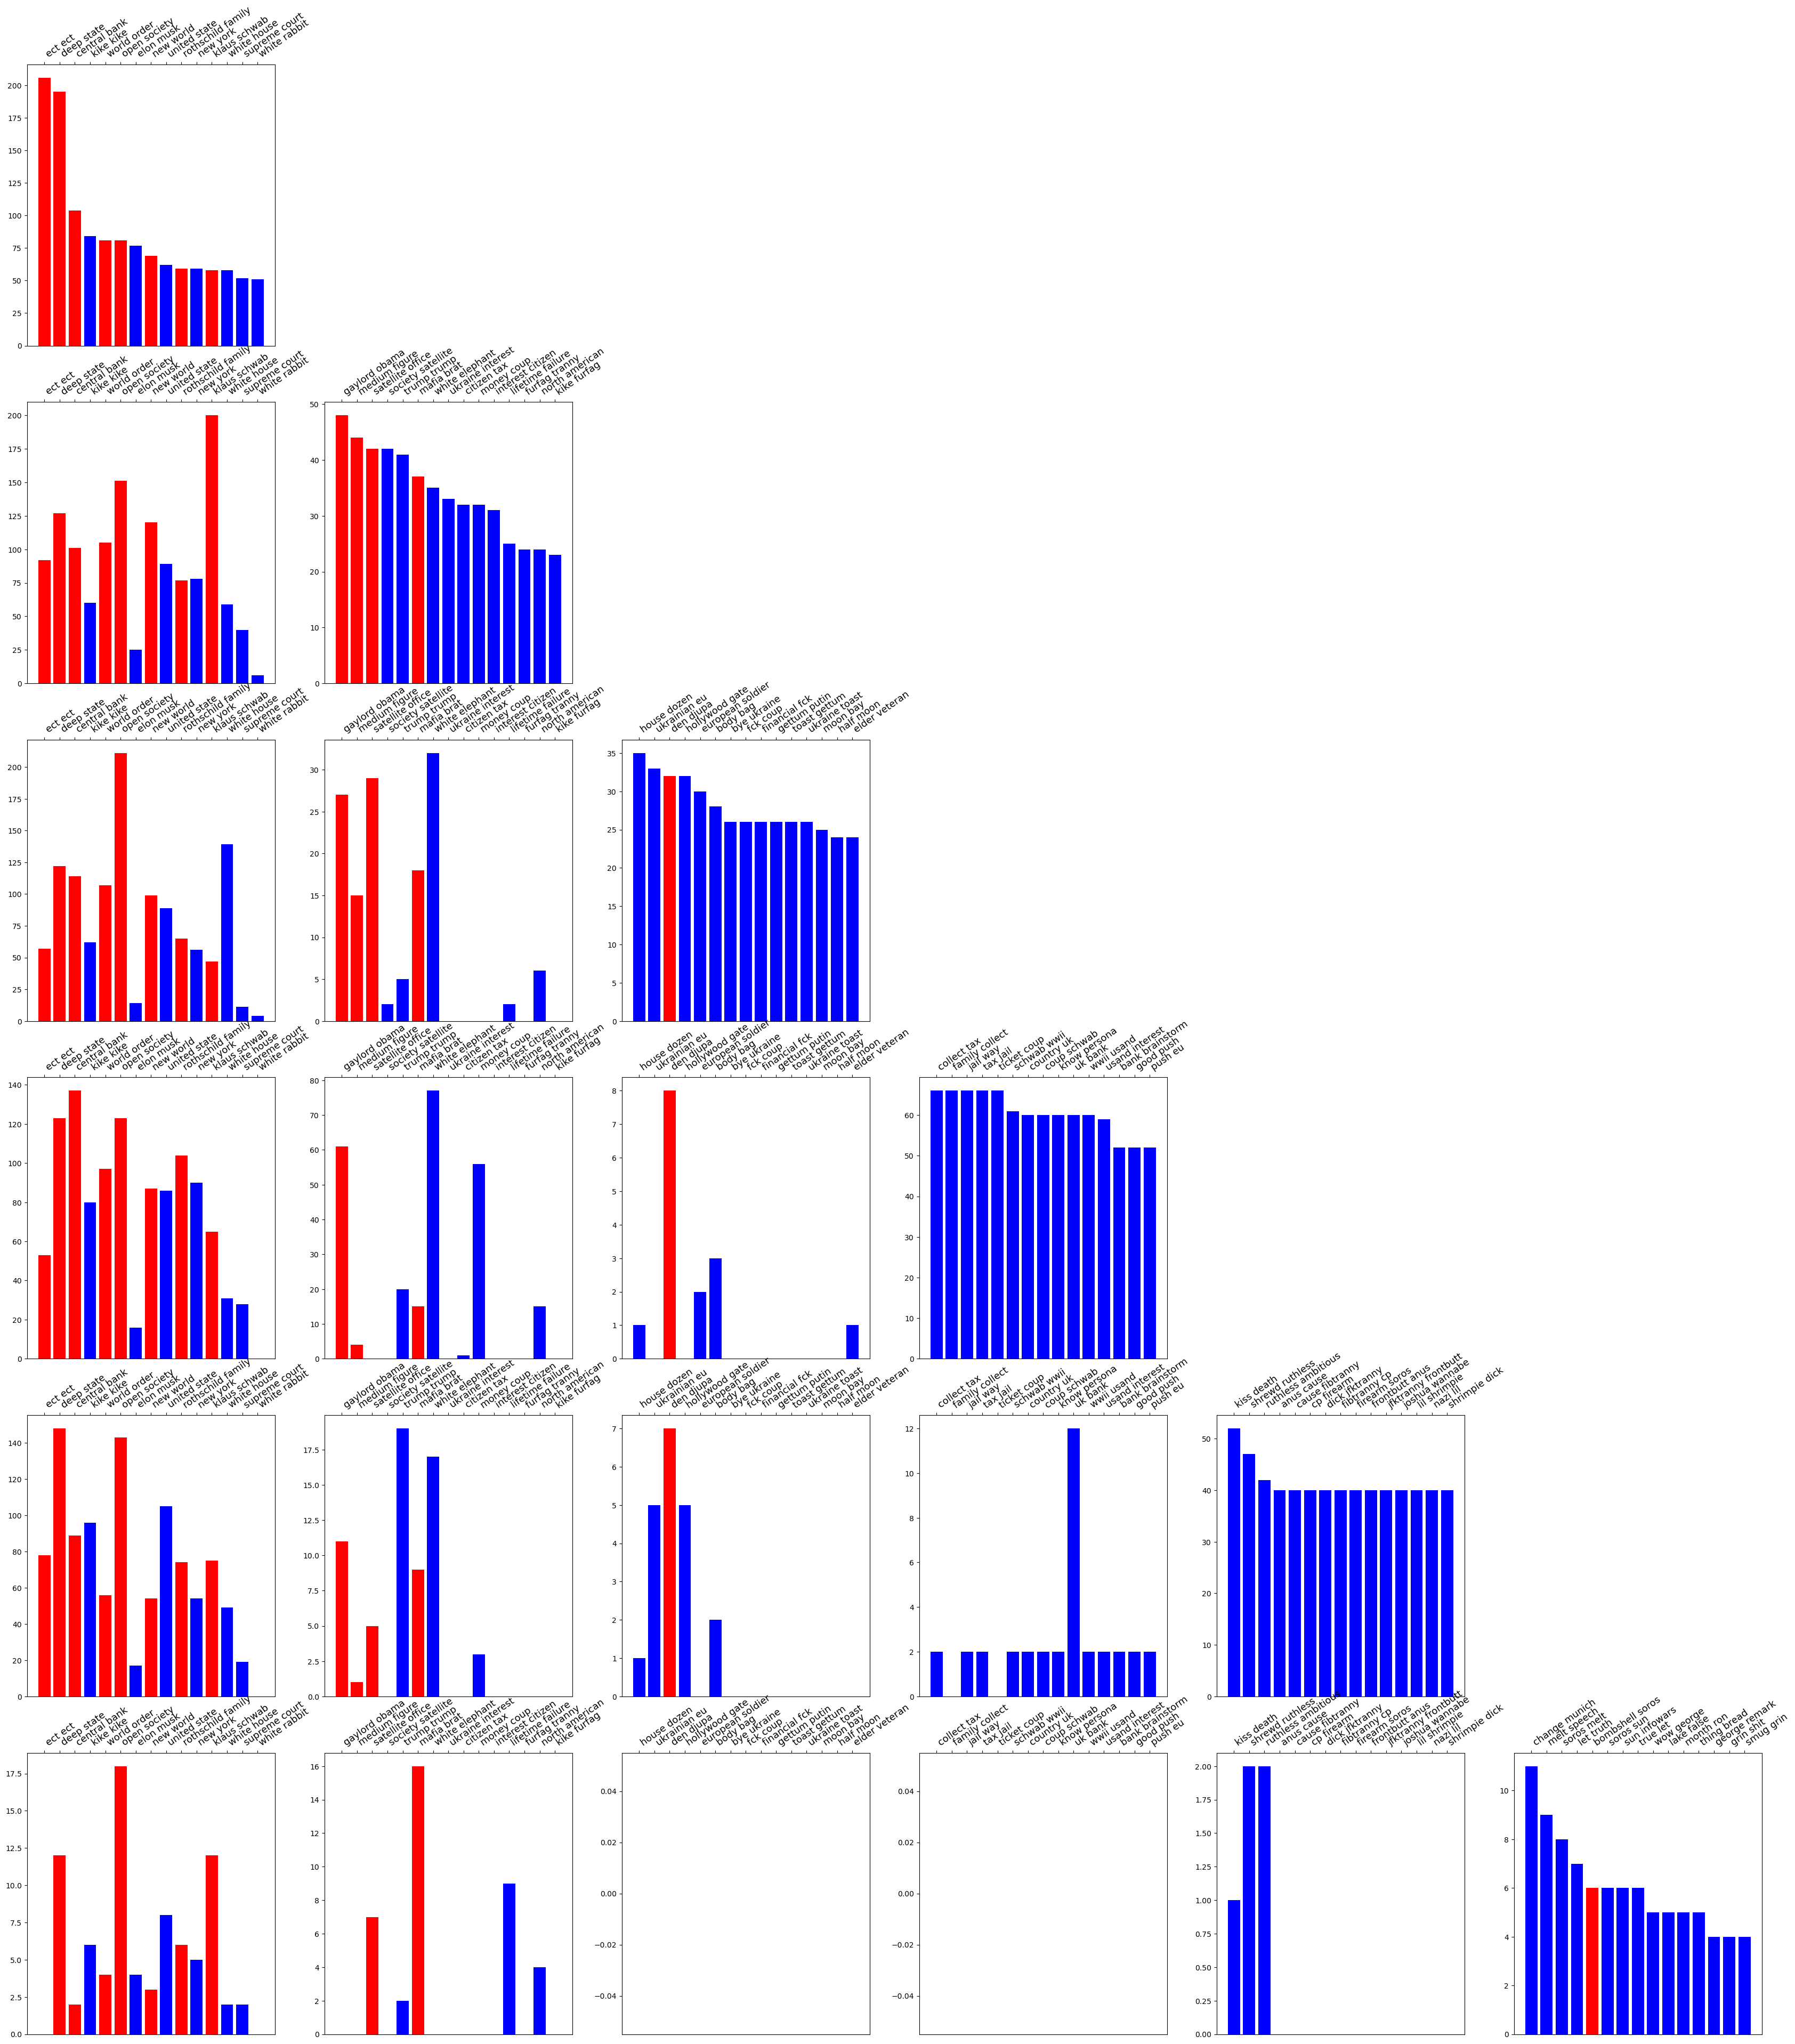

In [190]:
#fig.set_figwidth(43)
#fig.set_figheight(48)
#fig.delaxes(axes[1][2])
#fig.tight_layout()
#plot_color_label_after(fig,'deep state')
fig
#colors = ['red' if word == target else 'blue' for word in data.word]

In [126]:
fig.savefig("figure.png")

In [191]:
fig.savefig("myimage.eps", dpi=1200)

In [8]:
similarity_df=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/Research_paper/similarity_df.csv")

In [9]:
similarity_df=similarity_df[(similarity_df['true_label']==1) & (similarity_df['predict']==1)]

In [16]:
#imp_terms=list(similarity_df['Term'])
#imp_terms=[' '.join(i.split('_')) for i in imp_terms]
imp_terms.insert(0,'date')
len(imp_terms)

57

In [17]:
def terms_frequency(starting_date,windowsize):
    df=pd.DataFrame(columns=imp_terms)
    x=pd.to_datetime(starting_date)
    r={}
    check=True
    if x>data['Date'].max():
        return 'Check the starting date'
    
    while(check):
        r['date']=x
        if (x+timedelta(days=windowsize))>=data['Date'].max():
            y=data['Date'].max()
            check=False
        else:
            y=(x+timedelta(days=windowsize))
        data1=data['clean'][(data['Date']>=x)&(data['Date']<y)]
        text=' '.join(data1)
        x=x+timedelta(days=windowsize)
        
        text1=text.split(" ")
        pairs=list(zip(text1[:-1],text1[1:]))
        bigrams=[' '.join(i) for i in pairs]
        for i in range(1,len(imp_terms)):
            r[imp_terms[i]]=0
            for j in bigrams:
                if j==imp_terms[i] or imp_terms[i] in j:
                    r[imp_terms[i]]=r[imp_terms[i]]+1
        df=df.append(r,ignore_index = True)
        
    return df
        
    

In [27]:
new=terms_frequency(starting_date='2022-12-24',windowsize=10)

In [28]:
pd.DataFrame(new).to_csv("Antisemitism_terms.csv")